In [1]:
import pandas as pd # type: ignore
from sklearn.feature_extraction import DictVectorizer # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import root_mean_squared_error # type: ignore

import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

import warnings
warnings.filterwarnings('ignore')

### Q1. Downloading the data

In [2]:
january_data_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
february_data_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

# Read the data from parquet file
january_data = pd.read_parquet(january_data_url)
february_data = pd.read_parquet(february_data_url)


# Check the number of columns in the January data
num_columns_january = len(january_data.columns)
print(f"Number of columns in January data: {num_columns_january}")

Number of columns in January data: 19


In [3]:
def add_duration_column(df):
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    return df

def filter_data(df):
    filtered_df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
    fraction_left = len(filtered_df) / len(df)
    return filtered_df, fraction_left

def convert_df_to_dict_list(df):
    return df[['PULocationID', 'DOLocationID']].astype(str).to_dict(orient='records')

def get_feature_matrix(data, vectorizer_model):
    feature_matrix = vectorizer_model.transform(data)
    return feature_matrix

def visualize_model_performance(y_pred, y_actual):
    sns.histplot(y_pred, label='prediction')
    sns.histplot(y_actual, label='actual')
    plt.legend()

### Q2. Computing duration

In [4]:
january_data = add_duration_column(january_data)
std_duration_january = january_data['duration'].std()

print(f"Standard deviation of trip durations in January: {std_duration_january}")

Standard deviation of trip durations in January: 42.594351241920904


### Q3. Dropping outliers

In [5]:
filtered_jan_data, fraction_left = filter_data(january_data)

print(f"Fraction of records left after dropping outliers: {fraction_left * 100}%")

Fraction of records left after dropping outliers: 98.1220282212598%


### Q4. One-hot encoding

In [6]:
converted_jan_data = convert_df_to_dict_list(filtered_jan_data)
vectorizer = DictVectorizer()
vectorizer.fit(converted_jan_data)

jan_feture_matrix = get_feature_matrix(converted_jan_data, vectorizer)
num_columns_feature_matrix = jan_feture_matrix.shape[1]
print(f"Dimensionality of the feature matrix (number of columns): {num_columns_feature_matrix}")

Dimensionality of the feature matrix (number of columns): 515


### Q5. Training a model

In [7]:
X_train = jan_feture_matrix
y_train = filtered_jan_data['duration'].values

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_pred_train)
print(f"RMSE on training data: {train_rmse}")

RMSE on training data: 7.649262438906783


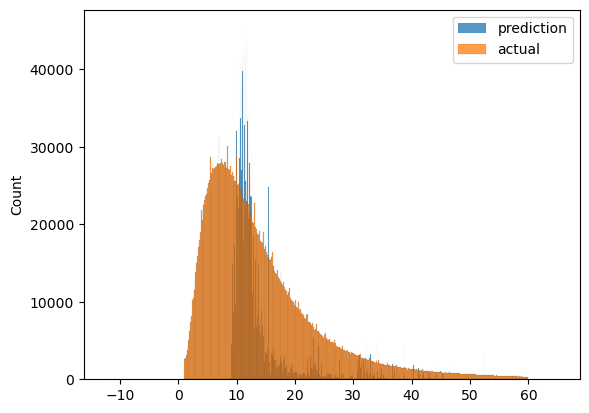

In [8]:
visualize_model_performance(y_pred_train, y_train)

### Q6. Evaluating the model

In [9]:
february_data = add_duration_column(february_data)
filtered_february_data, _ = filter_data(february_data)
converted_feb_data = convert_df_to_dict_list(filtered_february_data)

X_val = feature_matrix = get_feature_matrix(converted_feb_data, vectorizer)
y_val = filtered_february_data['duration'].values

y_pred_val = model.predict(X_val)

val_rmse = root_mean_squared_error(y_val, y_pred_val)
print(f"RMSE on validation data: {val_rmse}")

RMSE on validation data: 7.811811351718822


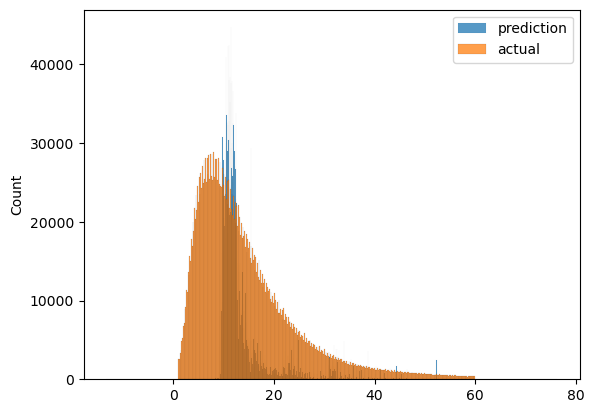

In [10]:
visualize_model_performance(y_pred_val, y_val)